<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1> Laboratorio de Física Contemporánea II </h1>
 <h2> Péndulo doble </h2>
 <h3>Autor: Aquino Chapa Martha Abril<h3>
 </div>
 
 Hecho en Julia 🔴🟢🟣 

In [1]:
#Paqueterías que se usarán
using Plots
using Statistics

El problema del péndulo doble considera dos péndulos unidos con masas los suficientemente grandes para despreciar efectos gravitacionales y además las varillas de los péndulos son rígidas.

Este problema es complicado de resolver analíticamente por lo que se ocupan algoritmos computacionales con la finalidad de calcular los momentos y ángulos de ambos péndulos en función del ángulo.

## PARTE 1:

El algoritmo que se utilizará para resolver el sistema de ecuaciones diferencias es el método Runge-Kutta de cuarto orden, por lo cual se crea una función la cual reciba otra función que determine el sistema de ecuaciones diferenciales, las condiciones iniciales y el tiempo para el cual se vaya a resolver el sistema.

In [1]:
#esta función regresa una lista de soluciones, cada entrada de
#arregla de salida corresponde a los datos en el tiempo i.
function RK_4(edo,x_ini,t,ω²=1)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(t[i], sol[i,:], ω²)
        k2 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k1, ω²)
        k3 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k2 , ω²)
        k4 = edo( t[i] + δ, sol[i,:] .+ δ.*k2, ω²)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 2 methods)

Se crea ahora una función la cual regrese los valores del sistema de ecuaciones diferenciales general:

In [ ]:
function EDO_pendulo_doble(t,variables,ω² = 1)
    # alpha = \theta1-\theta2
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

Para determinar si el método Runge Kutta creado es funcional se obtendrá la solución al pendulo doble para ángulos pequeños con la finalidad de comparar la solución númerica y la solución analítica.

In [ ]:
#variables = [θ1, θ2, p1,p2]
function EDO_pendulo_doble_angulos_pequeños(t,variables,ω²) 
    m = 1
    l = 1
    dθ1 = (12/(7*m*l^2))*variables[3] - (18/(7*m*l^2))*variables[4]
    dθ2 = (48/(7*m*l^2))*variables[4] - (18/(7*m*l^2))*variables[3]
    dp1 = -(3/2)*m*(l^2)*ω²*variables[1]
    dp2 = -(1/2)*m*(l^2)*ω²*variables[2]
    return [dθ1,dθ2,dp1,dp2]
end

In [ ]:
#Tiempo para el cual se obtendrán las soluciones
tiempo_1 = collect(0:0.0001:15)
#solución númerica considerando el sistema de ecuaciones diferenciales con las aproximaciones
soluciones_numericas_con_aproximacion = RK_4(EDO_pendulo_doble_angulos_pequeños, [0.01,0.01, 0,0], tiempo_1,1);
#Solución númerica considerando las ecuaciones diferenciales generales
soluciones_numericas = RK_4(EDO_pendulo_doble, [0.01,0.01, 0,0], tiempo_1,1);

In [ ]:
#Solución analítica
θ_1 = []
θ_2 = []
for t in tiempo_1
    push!(θ_1,
         2*(2.18882)* (12875750/46188059293)* cos(2.29517*t)+2*(1.19636)*(169478750/46188059293)*cos(0.855695*t)       
        )
    push!(θ_2, 
        -2*(4.59033)* (12875750/46188059293)* cos(2.29517*t)+2*(1.71139)*(169478750/46188059293)*cos(0.855695*t)    
        )
    end;


In [ ]:
#plot(tiempo_1,soluciones_numericas_con_aproximacion[:,1], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot(tiempo_1, θ_1, label = "Solución analítica", linewidth = 2.5)
plot!(tiempo_1,soluciones_numericas[:,1], label = "Solución númerica", linewidth = 2.5)#color = :black)
plot!(xlabel = "Tiempo", ylabel = "θ₁")

In [ ]:
#plot(tiempo_1,soluciones_numericas_con_aproximacion[:,2], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot(tiempo_1, θ_2, label = "Solución analítica", linewidth = 2.5)
plot!(tiempo_1,soluciones_numericas[:,2], label = "Solución númerica", linewidth = 2.5)#color = :black)
plot!(xlabel = "Tiempo", ylabel = "θ₂")

Ahorar obtenemos las diferencias máximas entre la solución analítica y las soluciones númericas para determinar si el tamaño en el paso en el tiempo es el adecuado para obtener un error de almenos 10$^{-6}$

In [ ]:
δθ1_aproximacion_numerica = maximum(θ_1.-soluciones_numericas_con_aproximacion[:,1])
#calculando el error porcentual promedio
δθ1_aproximacion_numerica_porcentual = abs(mean(100*(θ_1.-soluciones_numericas_con_aproximacion[:,1])./θ_1))
print("La diferencia máxima (para θ₁) considerando la ecuación diferencial aproximada es:  ", δθ1_aproximacion_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_aproximacion_numerica_porcentual, "% \n")

δθ1_numerica = maximum(θ_1.-soluciones_numericas[:,1])
δθ1_numerica_porcentual = abs(mean(100*(θ_1.-soluciones_numericas[:,1])./θ_1))
print("La diferencia máxima (para θ₁) considerando la ecuación diferencial general es:  ", δθ1_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_numerica_porcentual, "% \n")

δθ2_aproximacion_numerica = maximum(θ_2.-soluciones_numericas_con_aproximacion[:,2])
δθ2_aproximacion_numerica_porcentual = abs(mean(100*(θ_2.-soluciones_numericas_con_aproximacion[:,2])./θ_2))
print("La diferencia máxima (para θ₂) considerando la ecuación diferencial aproximada es:  ", δθ2_aproximacion_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ2_aproximacion_numerica_porcentual, "% \n")

δθ2_numerica = maximum(θ_2.-soluciones_numericas[:,2])
δθ1_numerica_porcentual = abs(mean(100*(θ_2.-soluciones_numericas[:,2])./θ_2))
print("La diferencia máxima (para θ₂) considerando la ecuación diferencial general es:  ", δθ2_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_numerica_porcentual, "% \n")


A partir de graficar diversas configuraciones entre los momentos y ángulos del péndulo doble es posible observar las curvas de Lissajous.

In [ ]:
plot(soluciones_numericas[:,1], soluciones_numericas[:,2], xlabel = "θ₁", ylabel = "θ₂", label = false)
plot!(soluciones_numericas_con_aproximacion[:,1], soluciones_numericas_con_aproximacion[:,2], xlabel = "θ₁", ylabel = "θ₂",
    label = false)#, linewidth = 2.5)
plot!(θ_1,θ_2, style = :dash, linewidth = 2.5 , label = "Analítica")

## PARTE 2:
Para determinar si el péndulo gira se calcularán las soluciones en cada paso del tiempo y se compara cada ángulo para analizar si se encuentra alrededor de una vecindad centrada en $pi$

In [23]:
#esta solamente es una copia de la función que almacena
#la información del sistema de ecuaciones diferenciales y es
#en la que evaluará el método Runge-Kutta
function EDO_pendulo_doble(t,variables)
    ω² = 10###l =98
    l = 0.98 #98
    m = 1
    # alpha = \theta1-\theta2
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

EDO_pendulo_doble (generic function with 1 method)

In [25]:
#Esta función genera una matriz donde en cada entrada almacena el tiempo de giro
# de la  solución tal que su condicion inicial es [θ_1[i],θ_2[j],0,0]
#Acepta un arreglo de condiciones iniciales θ_1 y θ_2
#El tiempo inicial, tiempo final, el paso en el tiempo y el tamaño de la
#vecindad con respecto a la cual se buscará si alguno de los péndulos gira
function generador_fractal(θ_1, θ_2, t_0, t_f, δ, ϵ)
   #matriz de ceros donde se aneará si el angulo da vuelta o no
    valores = zeros(length(θ_1), length(θ_2))
    
    #Número de pasos de tiempo que se darán antes de inicial a corroborar 
    #si el péndulo da vuelta
    pasos = 18
    
    #ciclo para barrer en todos los ángulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #empezamos a descartar los ángulos que sabemos que no giraran
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                #y se le asigna un valor mayor al tiempo final para determinar que les tomará 
                #más tiempo girar
                valores[j,i] = t_f+10
            
            #para los valores que sabemos que podrían girar
            else
                #Calculando la solución para los primersos pasos de tiempo
                t_1 = t_0
                solucion_t_1 = [θ_1[i], θ_2[j],0,0]
                
                t_2 = t_0
                solucion_t_2 = [θ_1[i], θ_2[j],0,0]
                
                
                for i in 1:pasos
                    t_1 = t_1 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    
                    t_2 = t_2 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                end 
                

                #buscamos el elemento de la solución tal que este alrededor de una vecindad epsilon de π
                while abs(abs(solucion_t_1[1])-π) > ϵ #
                    t_1 = t_1 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    if t_1 > t_f
                        break
                    end
                end
                
                
                
                while abs(abs(solucion_t_2[2])-π) > ϵ 
                    t_2 = t_2 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                    if t_2 > t_f
                        break
                    end
                end
                
                #si el péndulo da vuelta le pedimos le asignamos el tiempo menor donde dará vuelta    
                if abs(abs(solucion_t_1[1])-π) < ϵ || abs(abs(solucion_t_2[2])-π) < ϵ  
                    valores[j,i] = minimum([t_1,t_2])
                end
                
            end
        end
    end
    return valores
    
end

generador_fractal (generic function with 1 method)

In [30]:
theta1 = collect(0:0.01:π)
theta2 = collect(0:0.01:π)
datos = generador_fractal(theta1, theta2, 0, 10000, 0.1, 0.01)
#length(theta1)

315×315 Array{Float64,2}:
 10010.0  10010.0  10010.0  10010.0  …  5.2  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   3.3  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0  …  0.0  0.0  3.3   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     2.8  3.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  3.2  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0  …  0.0  0.0  0.0   2.9  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0

In [34]:
using CSV, DataFrames
CSV.write("I(w=10).csv",DataFrame(datos),header=false)

"I(w=10).csv"

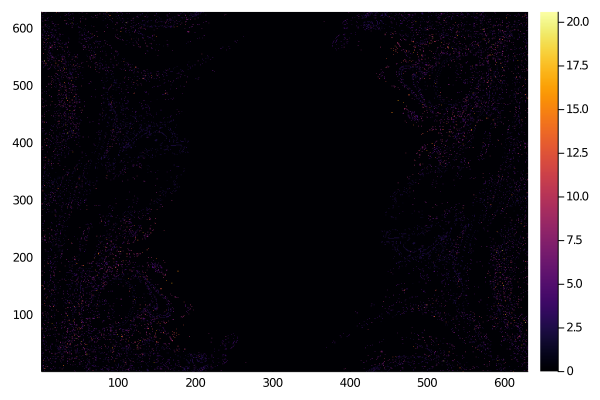

In [59]:
datos_1 = Matrix(CSV.read("fractal(w^2=10).csv",DataFrame));

for j in 1:length(datos_1)
    if datos_1[j]>21
        datos_1[j]=0
    end
end
maximum(datos_1)
heatmap(datos_1)

Para guardar y hacer un primer mapeo del fractal se realiza:
using Plots, DataFrames, CSV

Para escribir el archivo csv
CSV.write("nombre.csv", DataFrame(datos), header = false)

Para leer el archivo y transformarlo en una matriz para poder usar despues la función heatmap

fractal_datos = Matrix(CSV.read("nombre.cvs", DataFrame))

Para mapear el fractal
heatmap(fractal_datos)

In [48]:
#datos1 = Matrix( CSV.read("I.csv", DataFrame))
datos2 = Matrix( CSV.read("II(w=10).csv", DataFrame) )
#datos1_1 = Matrix( CSV.read("I_orilla.csv", DataFrame) )#esto no lo use
#datos2_1 = Matrix( CSV.read("II_orilla.csv", DataFrame) );#esto tampoco
datos1 = Matrix( CSV.read("I(w=10).csv", DataFrame))

314×315 Array{Float64,2}:
 10010.0  10010.0  10010.0  10010.0  …  0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   3.3  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  3.3   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0  …  0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     2.8  3.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  3.2  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   2.9  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0  …  0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
 10010.0  10010.0  10010.0  10010.0     0.0  3.0  7.1   0.0  0.0  0.0  0.0

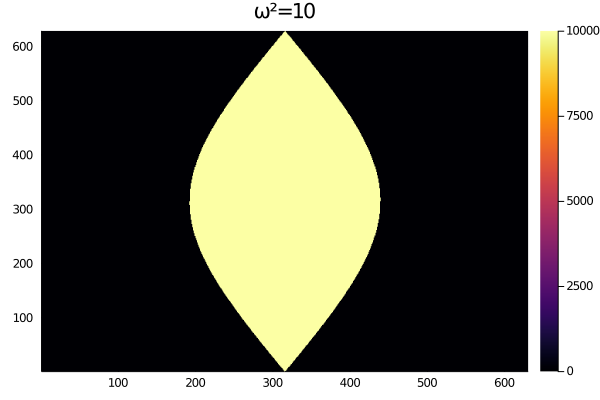

In [49]:
cuarto_cuadrante = zeros(314,315)
tercer_cuadrante = zeros(314,315)
datos_1 = datos1
datos_2 = datos2
for i in 0:length(datos_1)-1
    tercer_cuadrante[i+1] = datos_2[end-i]
end

for i in 0:length(datos_2)-1
    cuarto_cuadrante[i+1] = datos_1[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(datos_2,datos_1 )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)
heatmap(fractal, title="ω²=10")

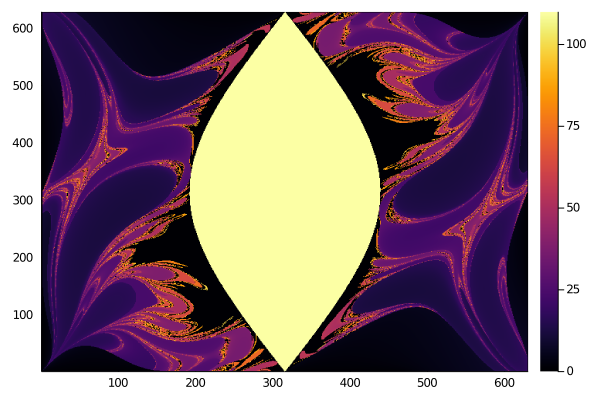

In [51]:
heatmap(Matrix(CSV.read("fractal(w^2=0.1).csv",DataFrame)))
